# Clustring
## Introduction
### This dataset contains data from a marketing campaign that aimed to capture time deposits. With this data, it is possible to use classification techniques and profile customers. The data of the clients approached were divided into 17 attributes, being 8 numeric classes and 9 of factors. The campaign reached 45211 customers and at the end of the campaign 5286 customers made the deposit.

### Import the module.

In [1]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

import plotly.express as px

### Import the dataset the find the first 5 rows' data

In [2]:
# importing the dataset

data = pd.read_csv('bank_customer_survey.csv')

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


### Get the data information.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [6]:
desc = ff.create_table(data.describe().T.applymap("{0:.02f}".format),index = True)
py.iplot(desc)

### checking if there is any NULL data

In [7]:

data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

### 17 attributes, being 8 numeric classes and 9 of factors.

### Get the dataset shape

In [8]:
data.shape

(45211, 17)

### List the numric variable

In [9]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

In [4]:
df = data.copy()

### Get the skeness

In [6]:
df.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
y            2.383480
dtype: float64

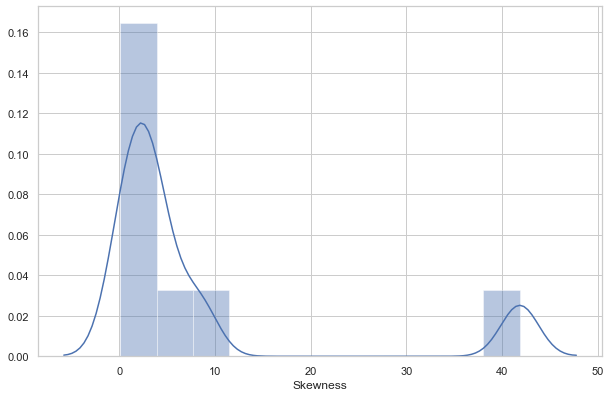

In [5]:
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = (9, 6)
sns.distplot(df.skew(),axlabel ='Skewness')
plt.show()

### Get the kurtosis

In [14]:
df.kurt()

age            0.319570
balance      140.751547
day           -1.059897
duration      18.153915
campaign      39.249651
pdays          6.935195
previous    4506.860660
y              3.681142
dtype: float64

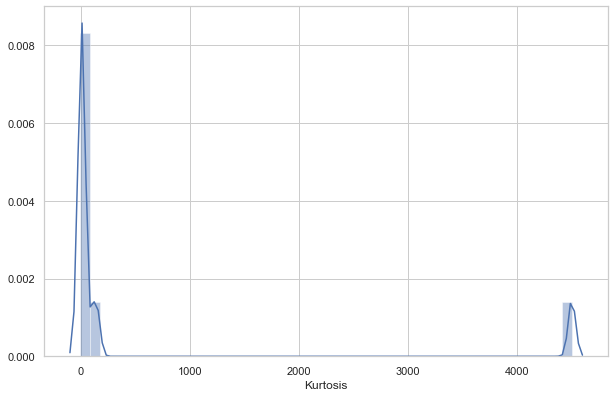

In [7]:
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = (9, 6)
sns.distplot(df.kurt(),axlabel ='Kurtosis')
plt.show()

### Based on the above analysis we found that variable "previous" has very high kurtosis and skeness.

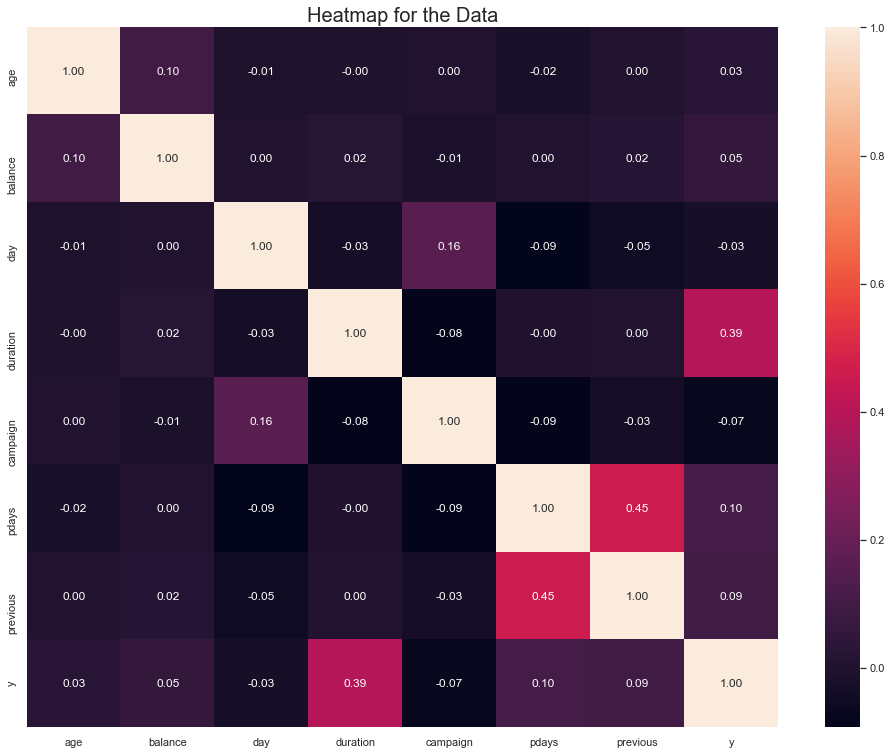

In [12]:
correlation = df.corr()
plt.rcParams['figure.figsize'] = (15, 12)
sns.heatmap(correlation, annot = True,fmt = ".2f")
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

### The correlation between previous and pdays, duraion and y is ralatively high.

### Then we should get the distribution of the numrical vatiable

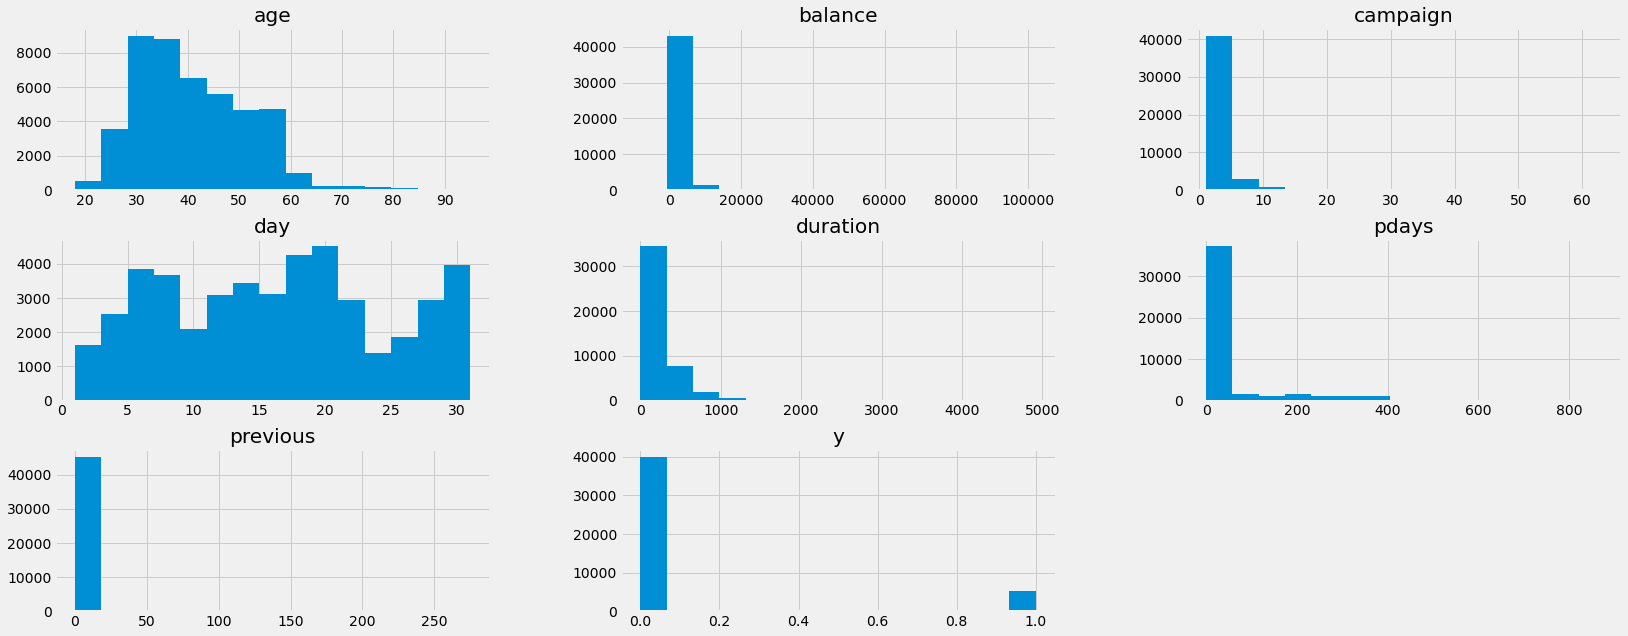

In [17]:
plt.rcParams['figure.figsize'] = (25, 10)
df.hist(bins = 15)
plt.show()

### Get the distribution of the numrical vatiable and simulated distribution curve

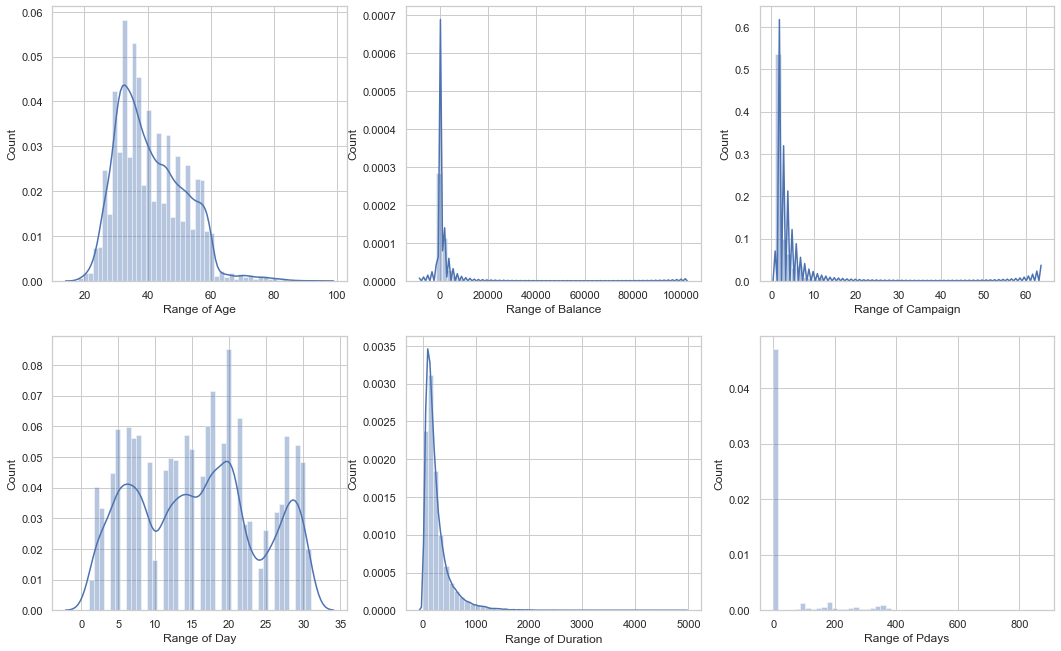

In [40]:
plt.rcParams['figure.figsize'] = (16,16)
sns.set(style = 'whitegrid')

plt.subplot(3, 3, 1)
sns.distplot(df['age'])
#plt.title('Distribution of Balance', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')


plt.subplot(3, 3, 2)
sns.distplot(data['balance'])
#plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Balance')
plt.ylabel('Count')


plt.subplot(3, 3, 3)
sns.distplot(data['campaign'])
#plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Campaign')
plt.ylabel('Count')


plt.subplot(3, 3, 4)
sns.distplot(data['day'])
#plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Day')
plt.ylabel('Count')

plt.subplot(3, 3, 5)
sns.distplot(data['duration'])
#plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Duration')
plt.ylabel('Count')

plt.subplot(3, 3, 6)
sns.distplot(data['pdays'])
#plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Pdays')
plt.ylabel('Count')



plt.show()

### Get the distribution of the Categorical vatiable

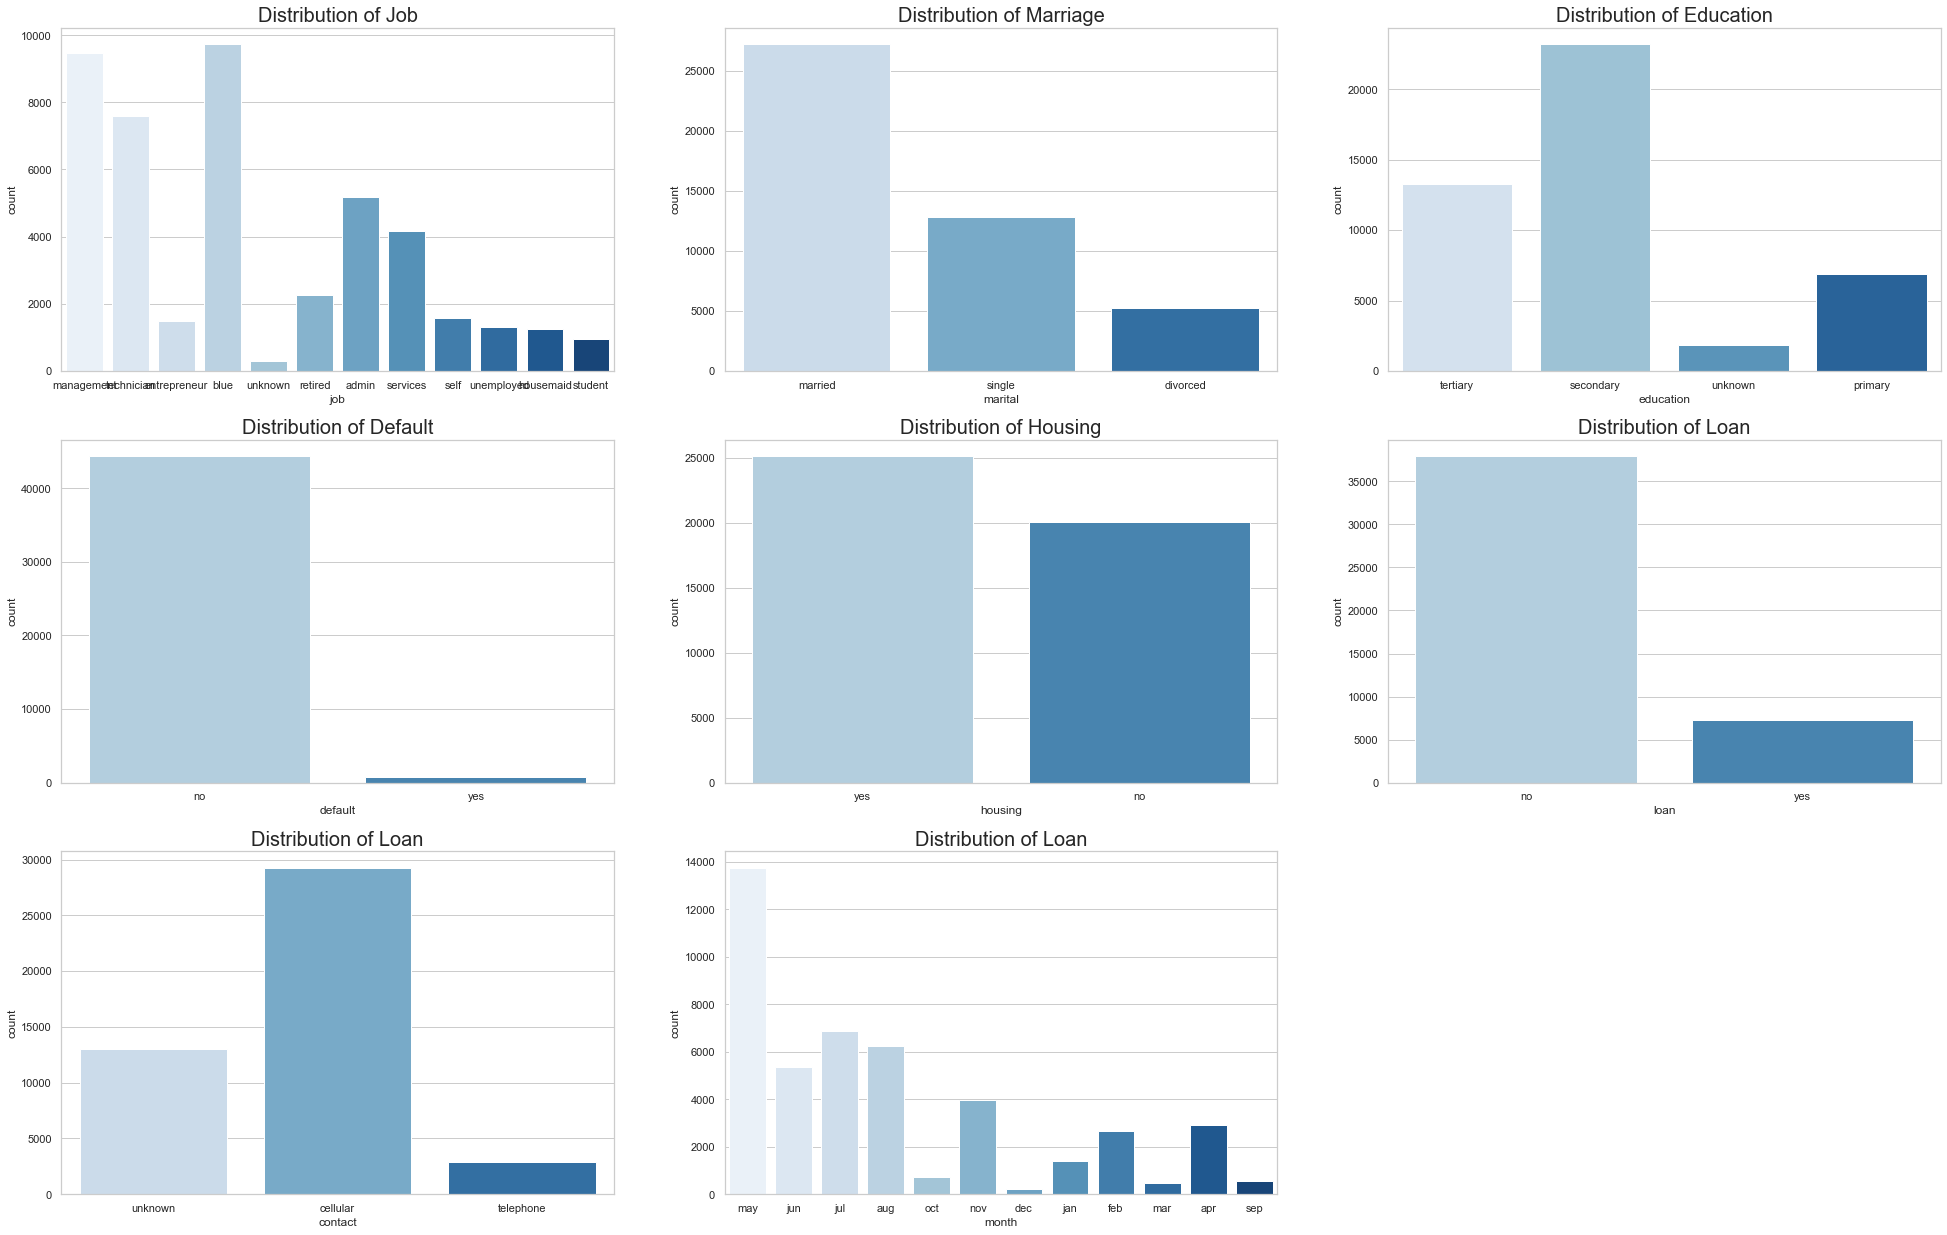

In [19]:
plt.rcParams['figure.figsize'] = (30, 20)
sns.set(style = 'whitegrid')

plt.subplot(3, 3, 1)
sns.countplot(x=df['job'], data = df,palette = 'Blues')
plt.title('Distribution of Job', fontsize = 20)
plt.subplot(3, 3, 2)
sns.countplot(x=df['marital'],data = df,palette = 'Blues')
plt.title('Distribution of Marriage', fontsize = 20)
plt.subplot(3, 3, 3)
sns.countplot(x=df['education'],data = df,palette = 'Blues')
plt.title('Distribution of Education', fontsize = 20)
plt.subplot(3, 3, 4)
sns.countplot(x=df['default'],data = df,palette = 'Blues')
plt.title('Distribution of Default', fontsize = 20)
plt.subplot(3, 3, 5)
sns.countplot(x=df['housing'],data = df,palette = 'Blues')
plt.title('Distribution of Housing', fontsize = 20)
plt.subplot(3, 3, 6)
sns.countplot(x=df['loan'],data = df,palette = 'Blues')
plt.title('Distribution of Loan', fontsize = 20)
plt.subplot(3, 3, 7)
sns.countplot(x=df['contact'],data = df,palette = 'Blues')
plt.title('Distribution of Loan', fontsize = 20)
plt.subplot(3, 3, 8)
sns.countplot(x=df['month'],data = df,palette = 'Blues')
plt.title('Distribution of Loan', fontsize = 20)

plt.show()

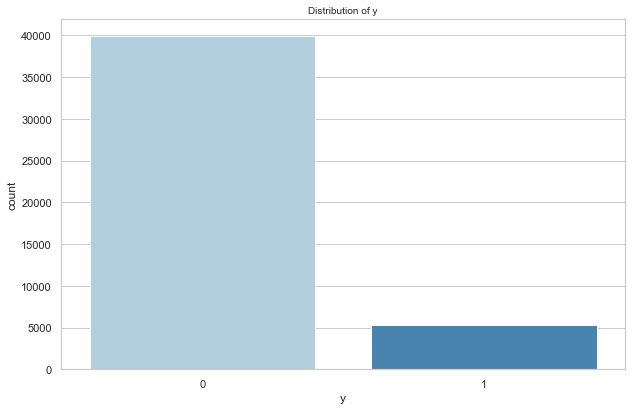

In [20]:
plt.rcParams['figure.figsize'] = (9,6)
sns.set(style = 'whitegrid')
sns.countplot(x=df['y'],data = df,palette = 'Blues')
plt.title('Distribution of y', fontsize = 10)
plt.show()

### Based on whether the campaign is effictive, get the distribution of numrical variable

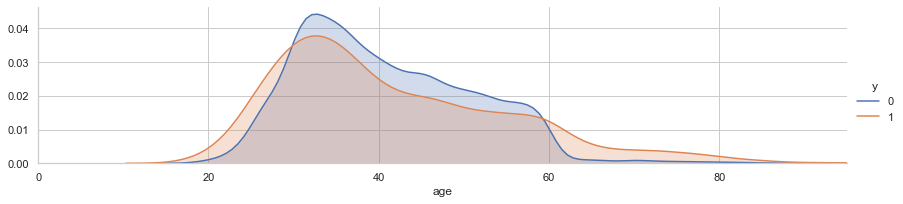

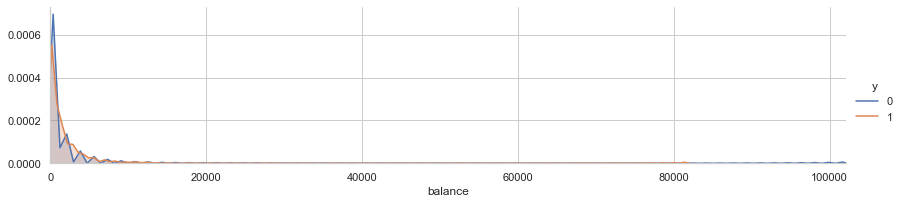

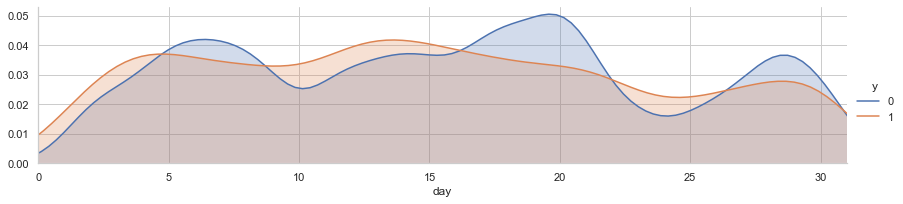

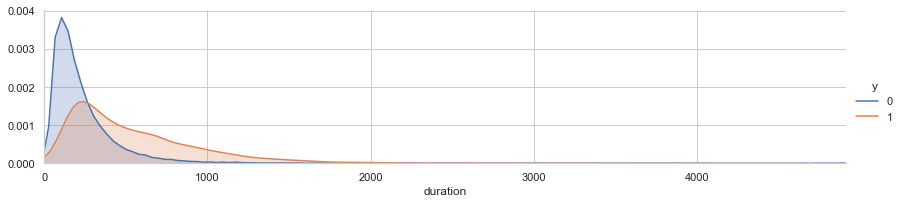

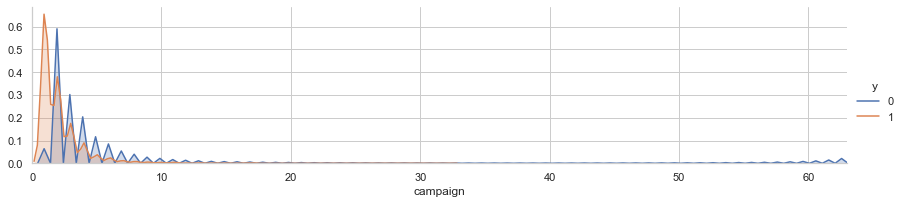

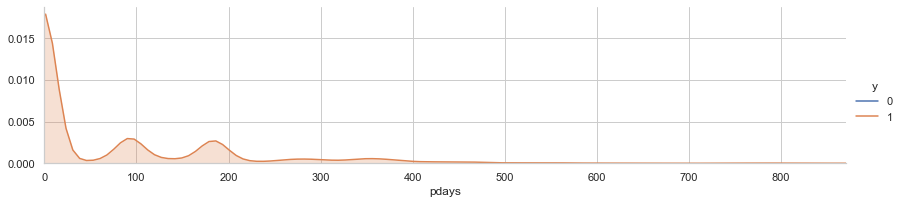

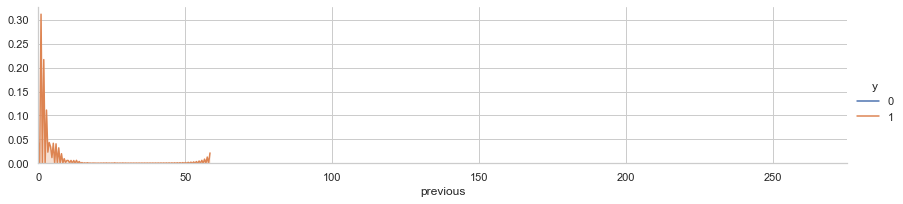

In [44]:
facet = sns.FacetGrid(df,hue="y",aspect = 4)
facet.map(sns.kdeplot,"age",shade = True)
facet.set(xlim = (0,df["age"].max()))
facet.add_legend()

facet = sns.FacetGrid(df,hue="y",aspect = 4)
facet.map(sns.kdeplot,"balance",shade = True)
facet.set(xlim = (0,df["balance"].max()))
facet.add_legend()

facet = sns.FacetGrid(df,hue="y",aspect = 4)
facet.map(sns.kdeplot,"day",shade = True)
facet.set(xlim = (0,df["day"].max()))
facet.add_legend()

facet = sns.FacetGrid(df,hue="y",aspect = 4)
facet.map(sns.kdeplot,"duration",shade = True)
facet.set(xlim = (0,df["duration"].max()))
facet.add_legend()

facet = sns.FacetGrid(df,hue="y",aspect = 4)
facet.map(sns.kdeplot,"campaign",shade = True)
facet.set(xlim = (0,df["campaign"].max()))
facet.add_legend()

facet = sns.FacetGrid(df,hue="y",aspect = 4)
facet.map(sns.kdeplot,"pdays",shade = True)
facet.set(xlim = (0,df["pdays"].max()))
facet.add_legend()

facet = sns.FacetGrid(df,hue="y",aspect = 4)
facet.map(sns.kdeplot,"previous",shade = True)
facet.set(xlim = (0,df["previous"].max()))
facet.add_legend()


plt.show()

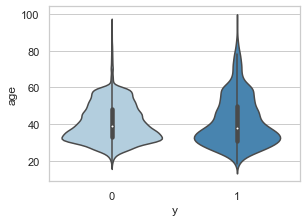

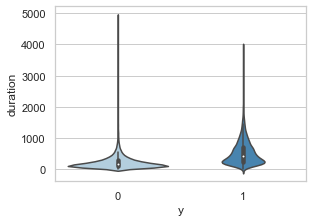

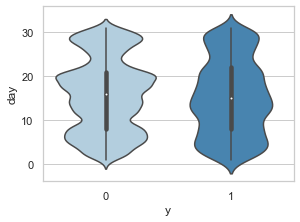

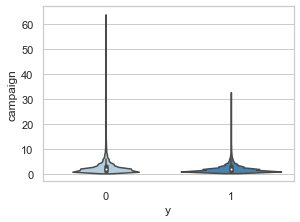

In [15]:
plt.rcParams['figure.figsize'] = (4,3)


sns.violinplot(data['y'], data['age'], palette = 'Blues')

plt.show()

sns.violinplot(data['y'], data['duration'], palette = 'Blues')

plt.show()

sns.violinplot(data['y'], data['day'], palette = 'Blues')

plt.show()

sns.violinplot(data['y'], data['campaign'], palette = 'Blues')

plt.show()



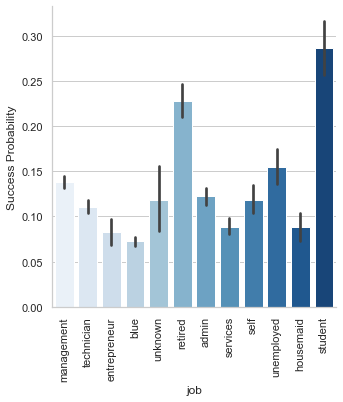

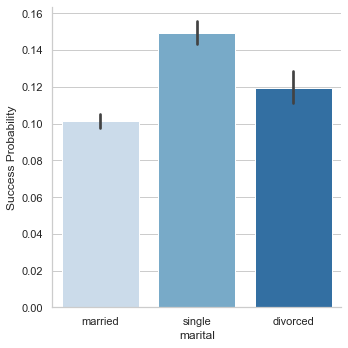

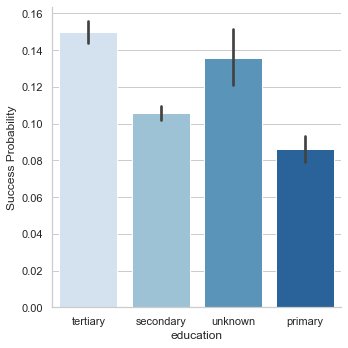

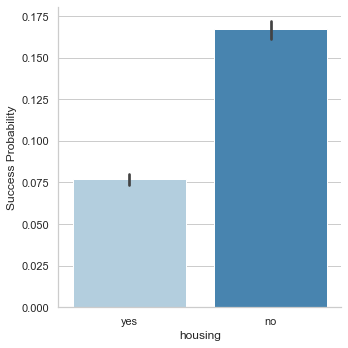

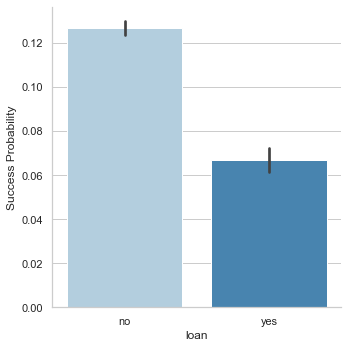

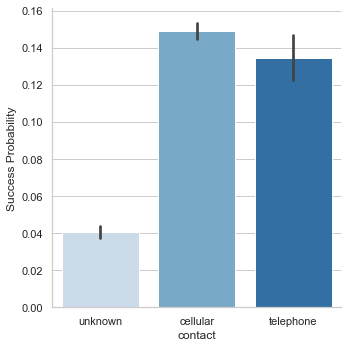

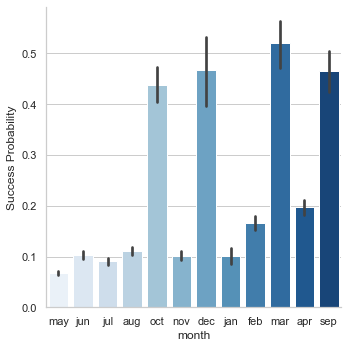

In [22]:
plt.rcParams['figure.figsize'] = (4,3)
sns.set(style = 'whitegrid')

sns.factorplot(x = "job", y = "y", data = df, kind = "bar",palette = 'Blues')
plt.ylabel("Success Probability")
plt.xticks(rotation=90)
plt.show()

sns.factorplot(x = "marital", y = "y", data = df, kind = "bar",palette = 'Blues')
plt.ylabel("Success Probability")
plt.show()

sns.factorplot(x = "education", y = "y", data = df, kind = "bar",palette = 'Blues')
plt.ylabel("Success Probability")
plt.show()

sns.factorplot(x = "housing", y = "y", data = df, kind = "bar",palette = 'Blues')
plt.ylabel("Success Probability")
plt.show()

sns.factorplot(x = "loan", y = "y", data = df, kind = "bar",palette = 'Blues')
plt.ylabel("Success Probability")
plt.show()

sns.factorplot(x = "contact", y = "y", data = df, kind = "bar",palette = 'Blues')
plt.ylabel("Success Probability")
plt.show()

sns.factorplot(x = "month", y = "y", data = df, kind = "bar",palette = 'Blues')
plt.ylabel("Success Probability")
plt.show()



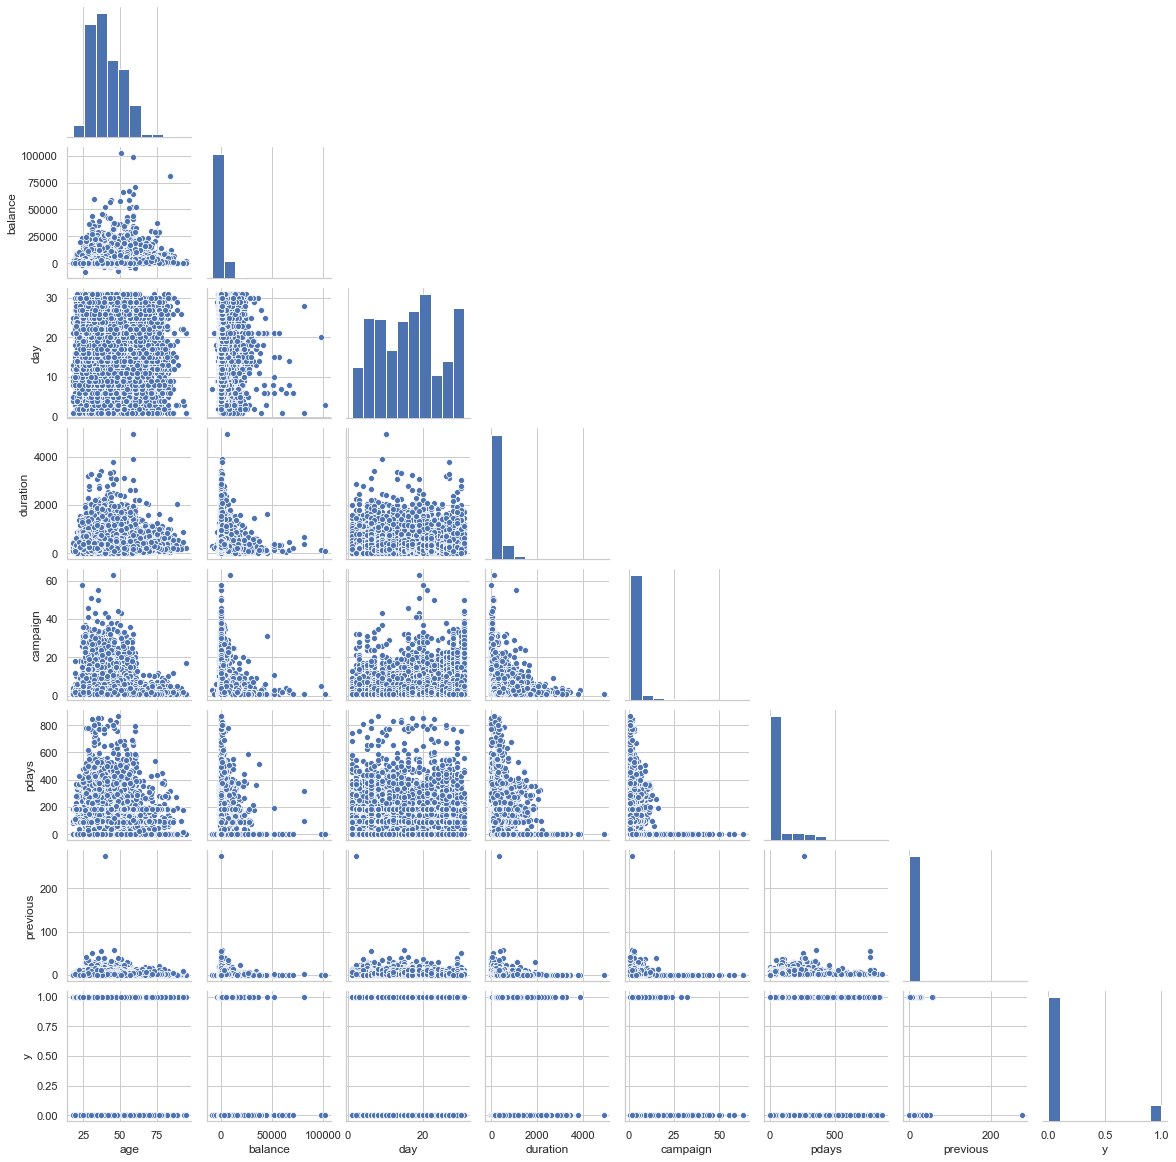

In [73]:
sns.set(style = 'whitegrid')
sns.pairplot(df,size = 2 ,kind ='scatter',corner=True)
plt.show()

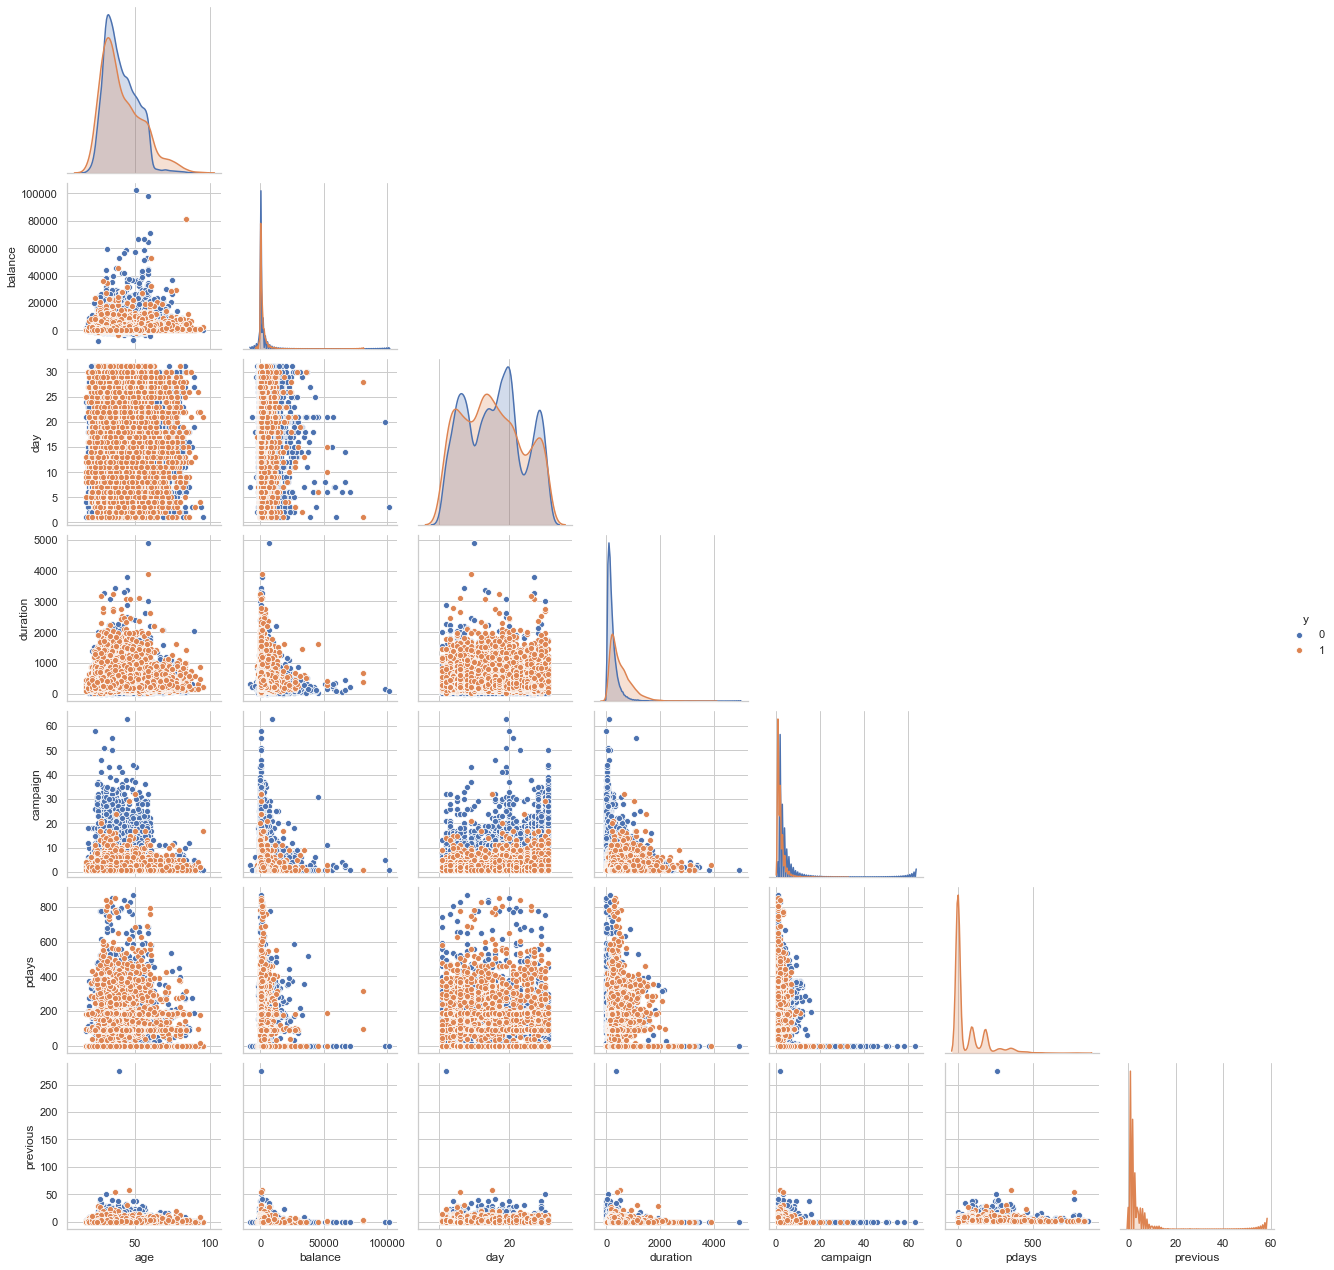

In [74]:
sns.pairplot(df,hue = 'y',corner=True)
plt.show()